# Assignment: vectorundergrad

----------- *UNDERGRADUATES ONLY* -------------------

**Few Important Things:**
 - Save this file as geo3_emailuser_attempt_assignment (e.g. geo3_mmann1123_attempt_vectorundergrad)
 - If you can't figure something out, that is ok, do your best and share it

## Assignment Description

For this assignment I want you to redo our in class analysis *Where can I afford to live in DC?* but for the income range $\$$75,000 to $\$$99,999. Why? Because some day you will have a decent job and you will still need to figure out where to live. 

In the following sections you will recreate the analysis. There will be a set of graded tasks to complete. 

### Task A
Complete the folowing:
- Use wget to download the tiger files
- open the tract .shp 
- drop uneeded columns

Add cells below complete your analysis.

In [283]:
# Start your analysis her
! curl -o ./tl_2017_11_tract.zip "https://www2.census.gov/geo/tiger/TIGER2017/TRACT/tl_2017_11_tract.zip"
! ls
! unzip  -o tl_2017_11_tract.zip  # mac linux
! ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  353k    0  353k    0     0  2633k      0 --:--:-- --:--:-- --:--:-- 2654k
Census 
data
geo3A_maryanashnitser_attempt1_vectorundergrad.ipynb
tl_2017_11_tract.cpg
tl_2017_11_tract.dbf
tl_2017_11_tract.prj
tl_2017_11_tract.shp
tl_2017_11_tract.shp.ea.iso.xml
tl_2017_11_tract.shp.iso.xml
tl_2017_11_tract.shp.xml
tl_2017_11_tract.shx
tl_2017_11_tract.zip
Archive:  tl_2017_11_tract.zip
 extracting: tl_2017_11_tract.cpg    
  inflating: tl_2017_11_tract.dbf    
  inflating: tl_2017_11_tract.prj    
  inflating: tl_2017_11_tract.shp    
  inflating: tl_2017_11_tract.shp.ea.iso.xml  
  inflating: tl_2017_11_tract.shp.iso.xml  
  inflating: tl_2017_11_tract.shp.xml  
  inflating: tl_2017_11_tract.shx    
Census 
data
geo3A_maryanashnitser_attempt1_vectorundergrad.ipynb
tl_2017_11_tract.cpg
tl_2017_11_tract.dbf
tl_2017_11_tract.prj
tl_2

### Task B
Create a list containing the `Name` (e.g. 'B43023_347E') of the census variables you will use in this analysis. Please grab all the variables that needed to calculate 'rent burdened' HHs (paying more than 30% of income in rent), but for our new higher income bracket. 

This should include for the $\$$75,000 to $\$$99,999 income bracket:
- HH spending 30\%> but < 35\% of income on rent
- HH spending 35\%> but < 40\% of income on rent
- HH spending 40\%> but < 50\% of income on rent
- HH spending 50\%> of income on rent
- The total number of HH in this income bracket that were interviewed
- The total number of HH that are 'not computed' (rent \% not calculated)

Enter your solution below in a list called `rent_vars`. 

In [284]:
# create a list here called rent_vars

# YOUR CODE HERE
#import necessary libraries and files
import geopandas as gpd
import pandas as pd 
dc_shp = gpd.read_file('./tl_2017_11_tract.shp')
variables = pd.read_html('https://api.census.gov/data/2017/acs/acs1/groups/B25074.html',header=0)

#list of relevant variables
rent_vars = [
'B25074_051E', 'B25074_052E', 'B25074_053E', 'B25074_054E', 'B25074_047E', 'B25074_055E']

In [285]:
"""Run the following: you should get no errors"""
assert type(rent_vars) == list
assert len(rent_vars) == 6

def check_elements_in_hashed_list(elements, hashed_set):
    return all(hashlib.sha256(item.encode('utf-8')).hexdigest() in hashed_set for item in elements)
hashed_set = {'7b5a1a1c29a99e5c5e1d733fd575abddb0742e6513ec9107e1936037f68ac6ef', '91f41771331deb15a9d3137ce37e16a35e1ea07f80fa782620e636ff6e2d34e1', '2faef795b785e8b1acdf55a916d24bdd8f893032ebe92bf220456cc7448f6648', 'cf836ecdb5a34a02add8e64c54a44be2083742500e3dd219310dd31d25a0052a', '147d61e0d2437bd9c7f40701348c0f17d5cd9e2a720a1c8846cb7af4f2bfe645', '320c7fbd44d32ff5194ea1d4acaa5051715ea6161e2f5dcd9d740c9f15924da1'}
result = check_elements_in_hashed_list(rent_vars, hashed_set)
assert result, 'please check your contents of rent_vars'


In [286]:
"""Run the following hidden tests"""

'Run the following hidden tests'

### Task C
Complete the folowing based on the methods used in class:
- Find and download all the appropriate variables for the analysis
- Calculate the percentage of households that are rent burdened (pay more than 30% of their income in rent)

Add cells below complete your analysis.

In [287]:
# Start your analysis here:
! pip install census us 
from census import Census
from us import states
states.NY.fips
# use census API key to start a download session
session = Census("983980b9fc504149e82117c949d7ed44653dc507")

# use session to download variables based on their name, geography, and year
dc_census = session.acs5.state_county_tract(fields = ('NAME', *rent_vars ),
                                      state_fips = states.DC.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2017)
print(type(dc_census))
dc_df = pd.DataFrame(dc_census)
dc_df.head()

<class 'list'>


,NAME,B25074_051E,B25074_052E,B25074_053E,B25074_054E,B25074_047E,B25074_055E,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",10.0,0.0,0.0,0.0,42.0,0.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",0.0,0.0,0.0,0.0,56.0,0.0,11,001,002202
2,"Census Tract 23.02, District of Columbia, Dist...",17.0,0.0,0.0,0.0,36.0,0.0,11,001,002302
3,"Census Tract 34, District of Columbia, Distric...",0.0,0.0,8.0,0.0,100.0,0.0,11,001,003400
4,"Census Tract 58, District of Columbia, Distric...",9.0,14.0,30.0,0.0,113.0,0.0,11,001,005800


In [288]:
# convert the data into a dataframe and view head()
print(type(dc_census))
dc_df = pd.DataFrame(dc_census)
dc_df.head()

<class 'list'>


,NAME,B25074_051E,B25074_052E,B25074_053E,B25074_054E,B25074_047E,B25074_055E,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",10.0,0.0,0.0,0.0,42.0,0.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",0.0,0.0,0.0,0.0,56.0,0.0,11,001,002202
2,"Census Tract 23.02, District of Columbia, Dist...",17.0,0.0,0.0,0.0,36.0,0.0,11,001,002302
3,"Census Tract 34, District of Columbia, Distric...",0.0,0.0,8.0,0.0,100.0,0.0,11,001,003400
4,"Census Tract 58, District of Columbia, Distric...",9.0,14.0,30.0,0.0,113.0,0.0,11,001,005800


In [289]:
#update column names to make sense 
variables_df = variables[0]  
'|'.join(rent_vars)

# create binary query to match variable names
name_match = variables_df["Name"].str.match( pat='|'.join(rent_vars))
sum(name_match) # number matching 

12

In [290]:
# Isolate the data
variable_names =  variables_df[name_match]
variable_names.head()

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
184,B25074_047E,"Estimate!!Total!!$75,000 to $99,999",HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...,predicate-only,NaN,0,int,B25074,NaN
185,B25074_047EA,"Annotation of Estimate!!Total!!$75,000 to $99,999",HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...,predicate-only,NaN,0,string,B25074,NaN
200,B25074_051E,"Estimate!!Total!!$75,000 to $99,999!!30.0 to 3...",HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...,predicate-only,NaN,0,int,B25074,NaN
201,B25074_051EA,"Annotation of Estimate!!Total!!$75,000 to $99,...",HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...,predicate-only,NaN,0,string,B25074,NaN
204,B25074_052E,"Estimate!!Total!!$75,000 to $99,999!!35.0 to 3...",HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...,predicate-only,NaN,0,int,B25074,NaN


In [291]:
# create dictionary of name replacements
variable_dict = {
'B25074_051E':'Total_Hhs_75-100_30_LT_35',
'B25074_052E':'Total_Hhs_75-100_GT_35_LT_40',
'B25074_053E':'Total_Hhs_75-100_GT_40_LT_50',
'B25074_054E':'Total_Hhs_75-100_GT_50',
'B25074_047E':'Total_Hhs_75-100_not_interviewed',
'B25074_055E':'Total_HHs_75-100_not_computed',
}

# use rename and the dictionary to replace our variable names
dc_df.rename(columns=variable_dict, inplace=True)
dc_df.head(2)

,NAME,Total_Hhs_75-100_30_LT_35,Total_Hhs_75-100_GT_35_LT_40,Total_Hhs_75-100_GT_40_LT_50,Total_Hhs_75-100_GT_50,Total_Hhs_75-100_not_interviewed,Total_HHs_75-100_not_computed,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",10.0,0.0,0.0,0.0,42.0,0.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",0.0,0.0,0.0,0.0,56.0,0.0,11,001,002202


In [292]:

# create measure of rent burden 
dc_df['P_Rent_Burdened'] = (dc_df['Total_Hhs_75-100_30_LT_35'] + 
                            dc_df['Total_Hhs_75-100_GT_35_LT_40'] + 
                            dc_df['Total_Hhs_75-100_GT_40_LT_50'] + 
                            dc_df['Total_Hhs_75-100_GT_50'] ) /(
                            dc_df['Total_Hhs_75-100_not_interviewed'] -
                            dc_df['Total_HHs_75-100_not_computed']) *100

dc_df['P_Rent_Burdened'] 

0      23.809524
1       0.000000
2      47.222222
3       8.000000
4      46.902655
         ...    
174     0.000000
175     0.000000
176    45.454545
177     7.975460
178    43.414634
Name: P_Rent_Burdened, Length: 179, dtype: float64

In [293]:
dc_df.head()

,NAME,Total_Hhs_75-100_30_LT_35,Total_Hhs_75-100_GT_35_LT_40,Total_Hhs_75-100_GT_40_LT_50,Total_Hhs_75-100_GT_50,Total_Hhs_75-100_not_interviewed,Total_HHs_75-100_not_computed,state,county,tract,P_Rent_Burdened
0,"Census Tract 21.02, District of Columbia, Dist...",10.0,0.0,0.0,0.0,42.0,0.0,11,001,002102,23.809524
1,"Census Tract 22.02, District of Columbia, Dist...",0.0,0.0,0.0,0.0,56.0,0.0,11,001,002202,0.000000
2,"Census Tract 23.02, District of Columbia, Dist...",17.0,0.0,0.0,0.0,36.0,0.0,11,001,002302,47.222222
3,"Census Tract 34, District of Columbia, Distric...",0.0,0.0,8.0,0.0,100.0,0.0,11,001,003400,8.000000
4,"Census Tract 58, District of Columbia, Distric...",9.0,14.0,30.0,0.0,113.0,0.0,11,001,005800,46.902655


### Task D
Complete the folowing:
- Merge the calculated percentage of households rent burdened into the tiger vector files

Add cells below complete your analysis.

In [294]:
# Create variable GEOID 
dc_df["GEOID"] = dc_df["state"] + dc_df["county"] + dc_df["tract"]
dc_df["GEOID"] 
dc_df.head()

,NAME,Total_Hhs_75-100_30_LT_35,Total_Hhs_75-100_GT_35_LT_40,Total_Hhs_75-100_GT_40_LT_50,Total_Hhs_75-100_GT_50,Total_Hhs_75-100_not_interviewed,Total_HHs_75-100_not_computed,state,county,tract,P_Rent_Burdened,GEOID
0,"Census Tract 21.02, District of Columbia, Dist...",10.0,0.0,0.0,0.0,42.0,0.0,11,001,002102,23.809524,11001002102
1,"Census Tract 22.02, District of Columbia, Dist...",0.0,0.0,0.0,0.0,56.0,0.0,11,001,002202,0.000000,11001002202
2,"Census Tract 23.02, District of Columbia, Dist...",17.0,0.0,0.0,0.0,36.0,0.0,11,001,002302,47.222222,11001002302
3,"Census Tract 34, District of Columbia, Distric...",0.0,0.0,8.0,0.0,100.0,0.0,11,001,003400,8.000000,11001003400
4,"Census Tract 58, District of Columbia, Distric...",9.0,14.0,30.0,0.0,113.0,0.0,11,001,005800,46.902655,11001005800


In [295]:
# merge data
dc_join = dc_shp.merge(right=dc_df, how='left',on='GEOID', validate='one_to_one')
dc_join.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Total_Hhs_75-100_30_LT_35,Total_Hhs_75-100_GT_35_LT_40,Total_Hhs_75-100_GT_40_LT_50,Total_Hhs_75-100_GT_50,Total_Hhs_75-100_not_interviewed,Total_HHs_75-100_not_computed,state,county,tract,P_Rent_Burdened
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2379832,2936613,...,0.0,0.0,0.0,0.0,83.0,0.0,11,001,010900,0.0
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2744444,83,...,0.0,0.0,0.0,0.0,112.0,0.0,11,001,010400,0.0
2,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,...,0.0,0.0,0.0,0.0,27.0,0.0,11,001,009903,0.0
3,11,001,009904,11001009904,99.04,Census Tract 99.04,G5020,S,426198,0,...,0.0,0.0,0.0,0.0,24.0,0.0,11,001,009904,0.0
4,11,001,009905,11001009905,99.05,Census Tract 99.05,G5020,S,431557,0,...,0.0,0.0,0.0,0.0,53.0,0.0,11,001,009905,0.0


### Task E
Complete the folowing:
- Create a histogram of the percent of rent burdened households (1.5 points)
- Add a title (0.5 points) and label the x-axis (0.5 points)

Add cells below complete your analysis.

Text(0, 0.5, 'Number of Census Tracts')

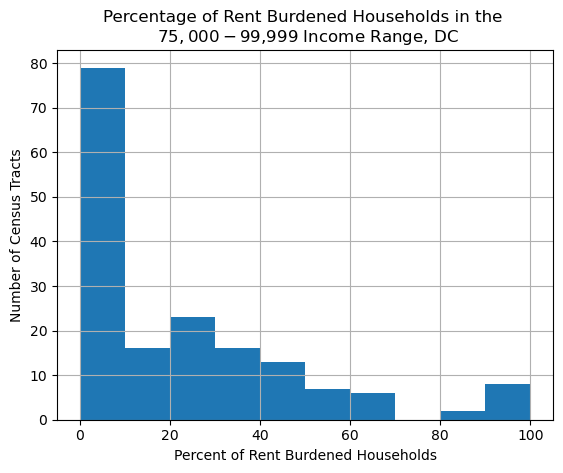

In [296]:
# Start your analysis here:

import matplotlib.pyplot as plt 
dc_df['P_Rent_Burdened'].hist()
plt.title ('Percentage of Rent Burdened Households in the \n $75,000 - $99,999 Income Range, DC')
plt.xlabel('Percent of Rent Burdened Households')
plt.ylabel('Number of Census Tracts')

### Task F
Complete the folowing:
- Create a map of the percent of rent burdened households (1.5 points)
- Include a title (0.5 points) and a legend using a scheme other than 'NaturalBreaks' (0.5)

Add cells below complete your analysis.

In [297]:
# Start your analysis here:

# import modules for mapping
import numpy as np 
import matplotlib.pyplot as plt 
import contextily as cx 
import geopandas as gpd 

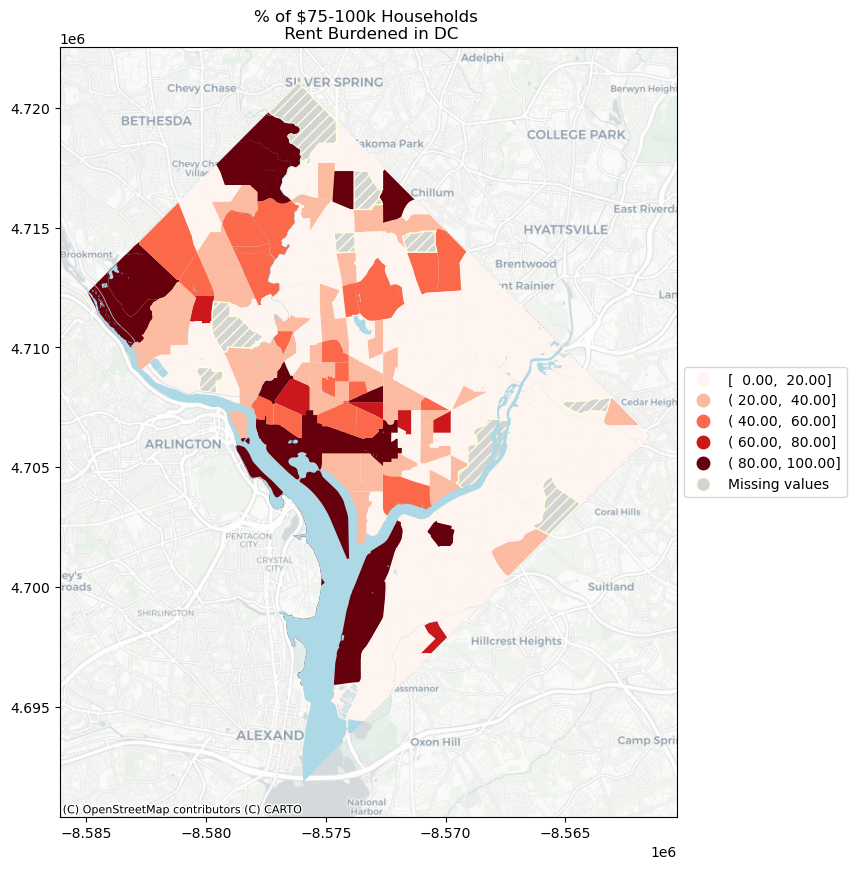

In [298]:
#Creating map
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure containing a single axes.
ax.set_title("% of $75-100k Households \n Rent Burdened in DC")  # Add a title to the axes.
dc_join.to_crs(epsg=3857).plot(ax=ax, column='P_Rent_Burdened', scheme='EqualInterval', k=5, \
             cmap='Reds', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'interval': True},
             missing_kwds={"color": "lightgrey","edgecolor": "lightyellow","hatch": "///","label": "Missing values",},
          )
water.to_crs(epsg=3857).plot(ax=ax, color='lightblue')
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)

### Task G
Use examples of using 'overlays' from the second vector analysis lecture to complete the following task. 

Complete the folowing:
- Use overlay functions to add quadrants (NE,SE,NW,SW) to your data

Add cells below complete your analysis.

In [299]:
# Start your analysis here:
# DC Quadrants
quad = gpd.read_file('https://opendata.arcgis.com/datasets/02923e4697804406b9ee3268a160db99_11.geojson')
quad  = quad[['QUADRANT','geometry']]
quad.head()

,QUADRANT,geometry
0,NW,"POLYGON ((-77.00859 38.94632, -77.00852 38.946..."
1,NE,"POLYGON ((-76.97755 38.94646, -76.97838 38.947..."
2,SW,"POLYGON ((-77.00907 38.88981, -77.00907 38.889..."
3,SE,"POLYGON ((-77.00544 38.88982, -77.00578 38.889..."


In [300]:
#
def map_quad():
    #Original Map
    fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure containing a single axes.
    ax.set_title("% of $75-100k Households \n Rent Burdened in DC")  # Add a title to the axes.
    dc_join.to_crs(epsg=3857).plot(ax=ax, column='P_Rent_Burdened', scheme='EqualInterval', k=5, \
             cmap='Reds', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'interval': True},
             missing_kwds={"color": "lightgrey","edgecolor": "lightyellow","hatch": "///","label": "Missing values",},
          )
    water.to_crs(epsg=3857).plot(ax=ax, color='lightblue')
    cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
    
    # Adding Quadrants
    quad.to_crs(epsg=3857).boundary.plot(ax=ax, color="black", linewidth=2, label="DC Quadrants")

    plt.show()


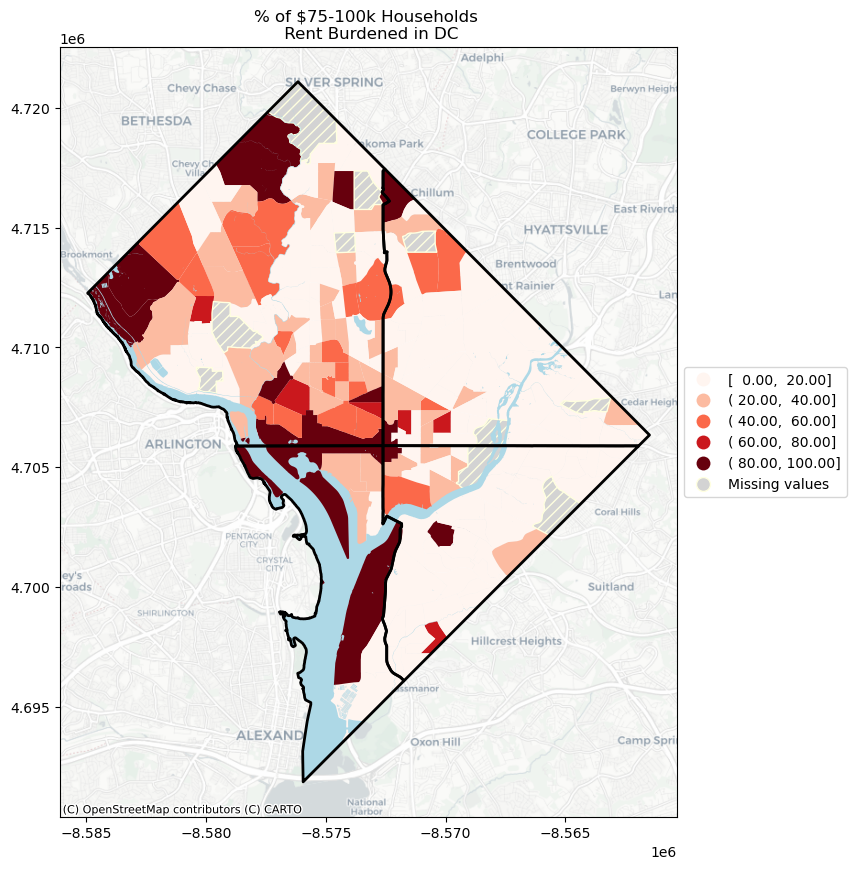

In [301]:
map_quad()

In [302]:
#tract = gpd.GeoDataFrame(tract, geometry='geometry', crs=tract.crs)
#geom = gpd.GeoDataFrame(geom, geometry='geometry', crs=tract.crs)

In [303]:
overlay = dc_join.overlay(quad, how = 'identity')

/Applications/miniconda3/envs/geo_envr/lib/python3.13/site-packages/geopandas/geodataframe.py:2675: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  return geopandas.overlay(


In [304]:
overlay.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Total_Hhs_75-100_GT_40_LT_50,Total_Hhs_75-100_GT_50,Total_Hhs_75-100_not_interviewed,Total_HHs_75-100_not_computed,state,county,tract,P_Rent_Burdened,QUADRANT,geometry
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2379832.0,2936613.0,...,0.0,0.0,83.0,0.0,11,001,010900,0.0,SW,"POLYGON ((-77.03913 38.80082, -77.03897 38.801..."
1,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2379832.0,2936613.0,...,0.0,0.0,83.0,0.0,11,001,010900,0.0,SE,"POLYGON ((-77.00138 38.82135, -77.00124 38.821..."
2,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2744444.0,83.0,...,0.0,0.0,112.0,0.0,11,001,010400,0.0,SW,"MULTIPOLYGON (((-77.00902 38.84004, -77.00886 ..."
3,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2744444.0,83.0,...,0.0,0.0,112.0,0.0,11,001,010400,0.0,SE,"POLYGON ((-77.00915 38.83956, -77.00909 38.839..."
4,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679.0,0.0,...,0.0,0.0,27.0,0.0,11,001,009903,0.0,NE,"POLYGON ((-76.92797 38.88981, -76.92717 38.889..."


### Task H
Use examples of using 'overlays' from the second vector analysis lecture to complete the following task. 

Complete the folowing:
- Create a histogram, using seaborn, of % households rent burdened broken down by quadrant ([examples](https://seaborn.pydata.org/generated/seaborn.histplot.html))

Add cells below complete your analysis.

Text(0.5, 1.0, '% of $75-100k Households Rent Burdened by Quadrant')

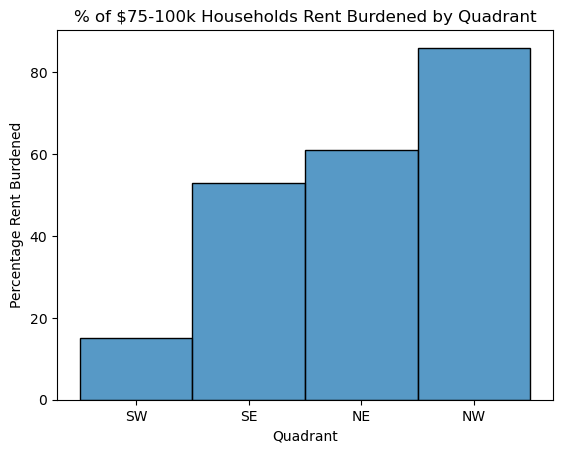

In [305]:
import seaborn as sns
sns.histplot(data = quad_intersect, x = 'QUADRANT')
plt.xlabel('Quadrant')
plt.ylabel('Percentage Rent Burdened')
plt.title('% of $75-100k Households Rent Burdened by Quadrant')